In [1]:
from sklearn import model_selection, preprocessing, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from pandas import get_dummies
import lightgbm as lgb
import matplotlib as mpl
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn
import scipy
import numpy
import json
import sys
import csv
import os

In C:\Users\Irtaza Hussain\miniconda3\envs\dl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Irtaza Hussain\miniconda3\envs\dl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Irtaza Hussain\miniconda3\envs\dl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Irtaza Hussain\miniconda3\envs\dl\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Irtaza H

In [2]:
sns.set(style ="white", context ="notebook", palette = "deep")
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.set_style("white")
pd.set_option("display.max_columns",500)
%matplotlib inline

### EDA
We willl be generating graphics that are both insightful and beautiful then we will review analytical and statistical operations:
1. Data Collection
2. Visualization
3. Data Cleaning
4. Data Preprocessing

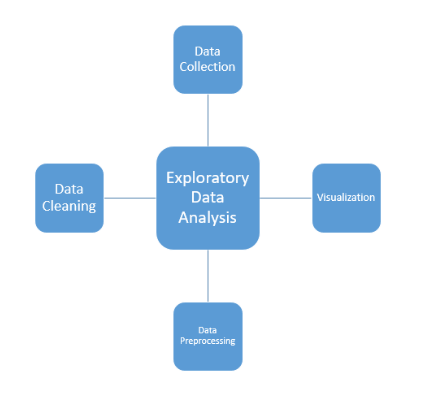


In [3]:
import os 
print(os.listdir("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data"))

['.ipynb_checkpoints', 'Data Dictionary.xlsx', 'Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'Statistical Analysis for Elo.ipynb', 'test.csv', 'train.csv']


In [4]:
main_train = pd.read_csv("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/train.csv", parse_dates=["first_active_month"])
main_test = pd.read_csv("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/test.csv",parse_dates=["first_active_month"])
main_merchants= pd.read_csv("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/merchants.csv")
main_new_merchant_transactions = pd.read_csv("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/new_merchant_transactions.csv")
main_historical_transactions = pd.read_csv("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/historical_transactions.csv")

In [5]:
sample_submission = pd.read_csv("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/sample_submission.csv")

In [6]:
sample_submission.shape

(123623, 2)

In [7]:
sample_submission.head()

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


In [8]:
print(main_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB
None


In [9]:
print(main_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null datetime64[ns]
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ MB
None


Explorer Dataset
1- Dimensions of the dataset.

2- Peek at the data itself.

3- Statistical summary of all attributes.

4- Breakdown of the data by the class variable.

Note: Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

Go to top
Note:

All data is simulated and fictitious, and is not real customer data
Each row is an observation (also known as : sample, example, instance, record).
Each colu

In [10]:
print("Shape of train set                 : ",main_train.shape)
print("Shape of test set                  : ",main_test.shape)
print("Shape of historical_transactions   : ",main_historical_transactions.shape)
print("Shape of merchants                 : ",main_merchants.shape)
print("Shape of new_merchant_transactions : ",main_new_merchant_transactions.shape)

Shape of train set                 :  (201917, 6)
Shape of test set                  :  (123623, 5)
Shape of historical_transactions   :  (29112361, 14)
Shape of merchants                 :  (334696, 22)
Shape of new_merchant_transactions :  (1963031, 14)


#### Data_dictionary Analysis
Elo Provides a excel file to describe about data(feature). It has four sheet and we have just read them with below code:

In [11]:
data_dictionary_train = pd.read_excel("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/Data_Dictionary.xlsx",
                                      sheet_name="train", engine='openpyxl')
data_dictionary_history = pd.read_excel("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/Data_Dictionary.xlsx",
                                        sheet_name="history", engine='openpyxl')
data_dictionary_new_merchant_period = pd.read_excel("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/Data_Dictionary.xlsx",
                                                    sheet_name="new_merchant_period", engine='openpyxl')
data_dictionary_merchant = pd.read_excel("C:/Users/Irtaza Hussain/Downloads/Data Analysis/Elo_data/Data_Dictionary.xlsx",
                                          sheet_name="merchant", engine='openpyxl')


Features can be from following types:

numeric
categorical
ordinal
datetime
coordinates
Find the type of features in Elo dataset?!

For getting some information about the dataset you can use info() command.

#### Train Analysis

In [12]:
main_train.tail()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
201912,2017-09-01,C_ID_963962de2c,3,2,1,-2.740821
201913,2015-10-01,C_ID_1314773c0b,3,1,1,0.312917
201914,2017-08-01,C_ID_7666735b3d,4,3,0,0.093494
201915,2016-07-01,C_ID_73f5a0efd0,3,2,1,-4.676589
201916,2017-07-01,C_ID_92c9984c58,3,1,1,-1.859413


In [13]:
data_dictionary_train.head(10)

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


3 features are anonymized 

In [14]:
main_train.tail()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
201912,2017-09-01,C_ID_963962de2c,3,2,1,-2.740821
201913,2015-10-01,C_ID_1314773c0b,3,1,1,0.312917
201914,2017-08-01,C_ID_7666735b3d,4,3,0,0.093494
201915,2016-07-01,C_ID_73f5a0efd0,3,2,1,-4.676589
201916,2017-07-01,C_ID_92c9984c58,3,1,1,-1.859413


After loading the data via pandas, we should checkout what the content is , description and the via the following:

In [15]:
main_train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


The train set is approximately twice the test set
The target data value is between -33.219281 and 17.965068

##### Test Analysis

In [16]:
print("-------test set------")
print(main_test.head(5))

-------test set------
  first_active_month          card_id  feature_1  feature_2  feature_3
0         2017-04-01  C_ID_0ab67a22ab          3          3          1
1         2017-01-01  C_ID_130fd0cbdd          2          3          0
2         2017-08-01  C_ID_b709037bc5          5          1          1
3         2017-12-01  C_ID_d27d835a9f          2          1          0
4         2015-12-01  C_ID_2b5e3df5c2          5          1          1


In [17]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
first_active_month    123622 non-null datetime64[ns]
card_id               123623 non-null object
feature_1             123623 non-null int64
feature_2             123623 non-null int64
feature_3             123623 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.7+ MB


In [18]:
main_test.describe()

,feature_1,feature_2,feature_3
count,123623.00000,123623.000000,123623.000000
mean,3.10926,1.741796,0.564377
std,1.18911,0.749195,0.495840
min,1.00000,1.000000,0.000000
25%,2.00000,1.000000,0.000000
50%,3.00000,2.000000,1.000000
75%,4.00000,2.000000,1.000000
max,5.00000,3.000000,1.000000


we can say that if we compare the describe features for test and tarin they are pretty similar

#### Historical Transactions Analysis

In [19]:
data_dictionary_history.head(10)

,historical_transactions.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Card identifier
3,month_lag,month lag to reference date
4,purchase_date,Purchase date
5,authorized_flag,"Y' if approved, 'N' if denied"
6,category_3,anonymized category
7,installments,number of installments of purchase
8,category_1,anonymized category
9,merchant_category_id,Merchant category identifier (anonymized )


In [20]:
main_historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [21]:
main_historical_transactions.shape

(29112361, 14)

 #### Merchant Analysis 

In [22]:
main_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [23]:
data_dictionary_merchant.head(30)


,merchants.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,merchant_id,Unique merchant identifier
3,merchant_group_id,Merchant group (anonymized )
4,merchant_category_id,Unique identifier for merchant category (anony...
5,subsector_id,Merchant category group (anonymized )
6,numerical_1,anonymized measure
7,numerical_2,anonymized measure
8,category_1,anonymized category
9,most_recent_sales_range,Range of revenue (monetary units) in last acti...


In [24]:
main_new_merchant_transactions.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
5,Y,C_ID_ef55cf8d4b,231,N,1,B,367,M_ID_8874615e00,2,-0.633007,2018-04-02 12:53:28,1.0,9,16
6,Y,C_ID_ef55cf8d4b,69,N,1,B,333,M_ID_6d061b5ddc,1,5.263697,2018-03-28 19:50:19,1.0,9,10
7,Y,C_ID_ef55cf8d4b,231,N,1,B,307,M_ID_df1e022f41,2,-0.553787,2018-04-05 08:06:52,1.0,9,19
8,Y,C_ID_ef55cf8d4b,69,N,1,B,278,M_ID_d15eae0468,2,-0.596643,2018-04-07 18:37:40,1.0,9,37
9,Y,C_ID_ef55cf8d4b,69,N,1,B,437,M_ID_5f9bffd028,1,-0.607191,2018-03-17 18:10:41,1.0,9,15


#### Data Cleaning 
we have zero NA in every column which is a good news. now to check Zeros

In [25]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [26]:
print ('for train :',check_missing_data(main_train))
print ('for test:',check_missing_data(main_test))

for train : False
for test:         first_active_month card_id feature_1 feature_2 feature_3
Total                    1       0         0         0         0
Percent        8.08911e-08       0         0         0         0
Types       datetime64[ns]  object     int64     int64     int64


Note: But if we had , we can just use dropna()(be careful sometimes you should not do this!)

In [27]:
#remove rows that have NA's
print("Before Dropping",main_train.shape)
main_train= main_train.dropna()
print("After Dropping", main_train.shape)

Before Dropping (201917, 6)
After Dropping (201917, 6)


We will get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

To print dataset columns, we can use columns atribute.

In [28]:
main_train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

## Data Visualization 

### Histogram 
Most of the targets almost have the value between +8 or -8. Checking through a plot for some abnormal value

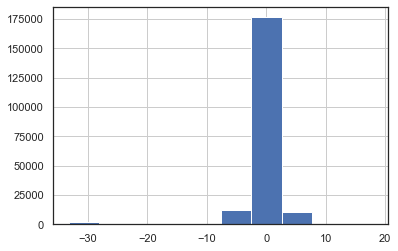

In [29]:
main_train["target"].hist();

as we can see have some value at -30 for which we need to be careful about 

In [30]:
main_train[main_train["target"]<-29].count()

first_active_month    2207
card_id               2207
feature_1             2207
feature_2             2207
feature_3             2207
target                2207
dtype: int64

array([[<AxesSubplot:title={'center':'feature_1'}>,
        <AxesSubplot:title={'center':'feature_2'}>],
       [<AxesSubplot:title={'center':'feature_3'}>,
        <AxesSubplot:title={'center':'target'}>]], dtype=object)

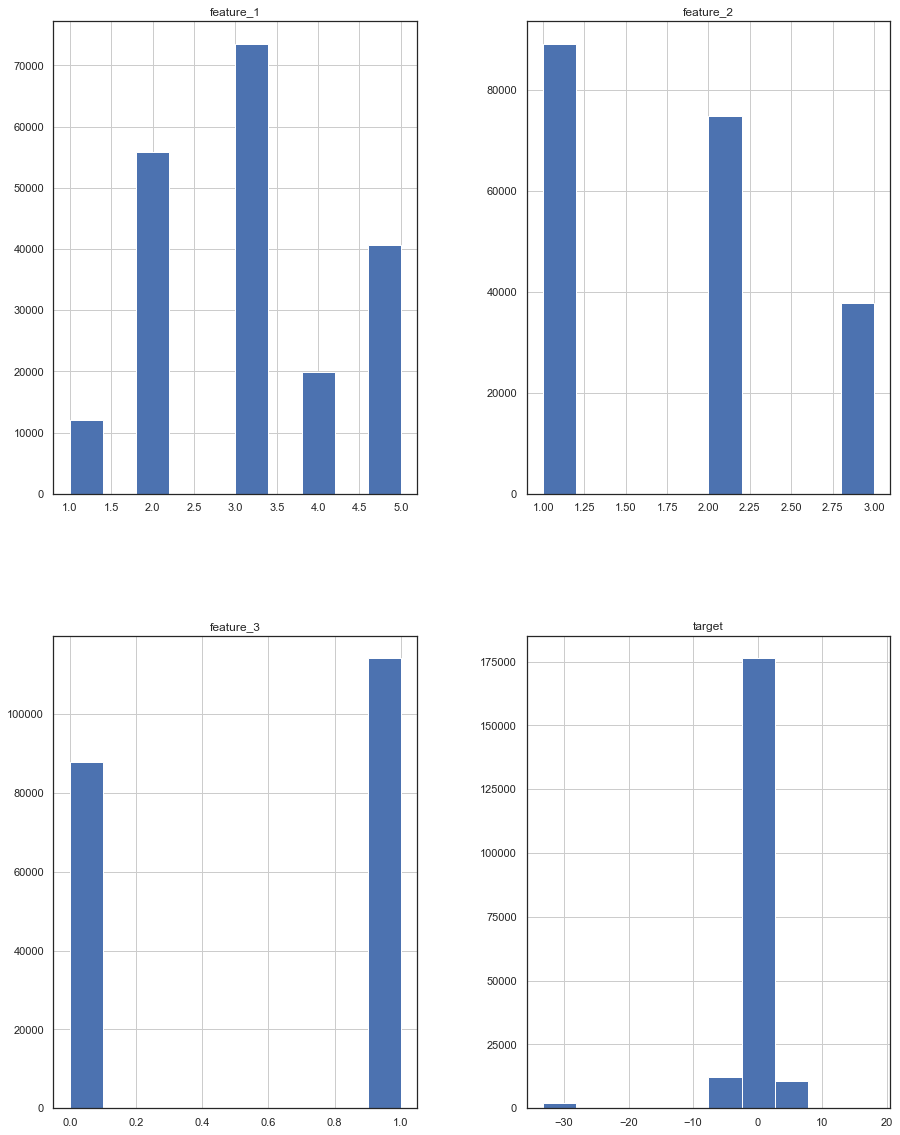

In [31]:
main_train.hist(figsize=(15,20))

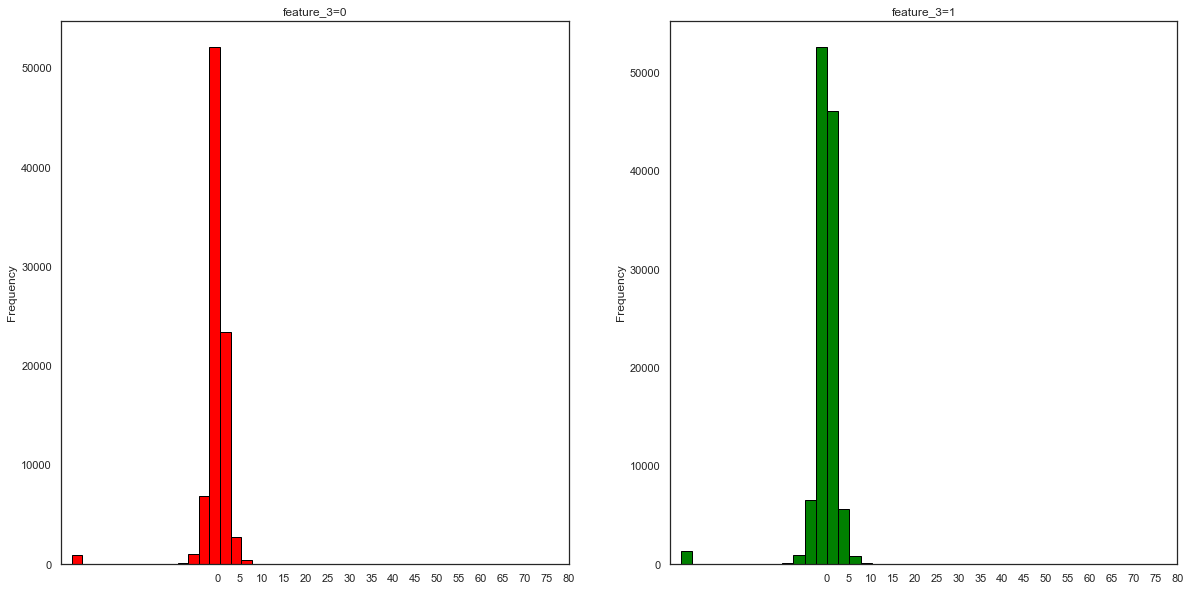

In [35]:
f,ax=plt.subplots(1,2,figsize=(20,10))
main_train[main_train["feature_3"]==0].target.plot.hist(ax=ax[0],bins=20,edgecolor="black", color="red")
ax[0].set_title("feature_3=0")
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
main_train[main_train["feature_3"]==1].target.plot.hist(ax=ax[1], color="green",bins=20,edgecolor="black")
ax[1].set_title("feature_3=1")
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

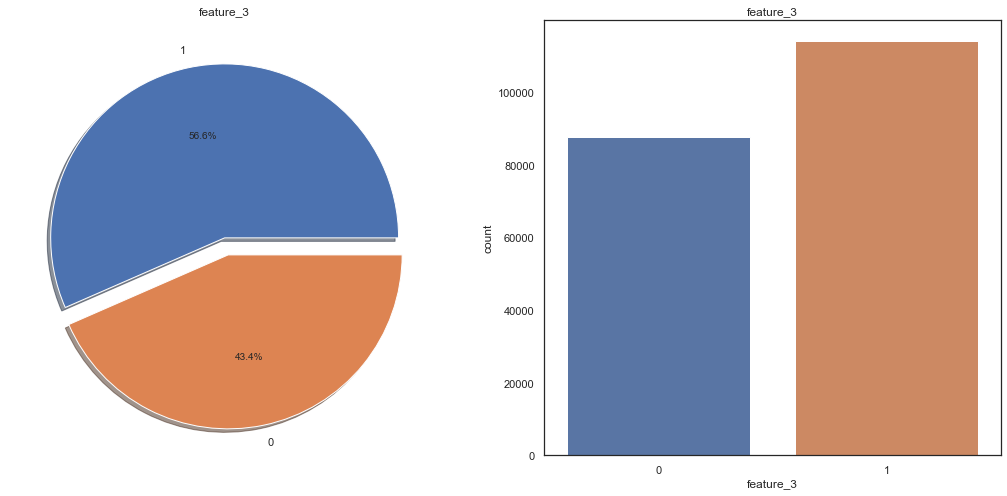

In [36]:
f,ax=plt.subplots(1,2,figsize=(18,8))
main_train["feature_3"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",ax=ax[0],shadow=True)
ax[0].set_title("feature_3")
ax[0].set_ylabel('')
sns.countplot("feature_3",data=main_train,ax=ax[1])
ax[1].set_title('feature_3')
plt.show()

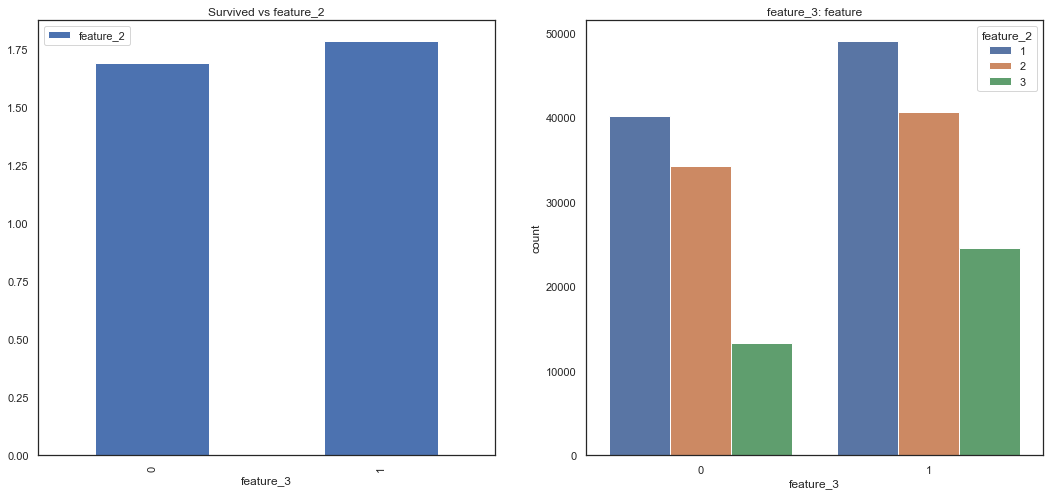

In [39]:
f,ax=plt.subplots(1,2,figsize=(18,8))
main_train[["feature_3","feature_2"]].groupby(["feature_3"]).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs feature_2")
sns.countplot("feature_3",hue="feature_2",data=main_train,ax=ax[1])
ax[1].set_title("feature_3: feature")
plt.show()

<AxesSubplot:xlabel='target', ylabel='Density'>

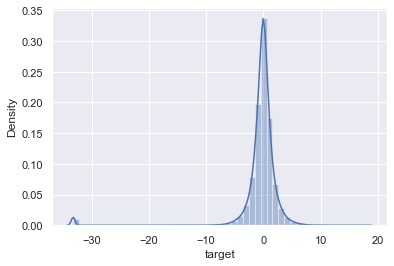

In [53]:
sns.distplot(main_train['target'])


<AxesSubplot:xlabel='feature_1', ylabel='target'>

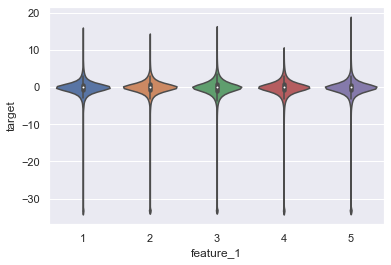

In [54]:
sns.violinplot(data=main_train,x="feature_1",y="target")

###  Scatter plot

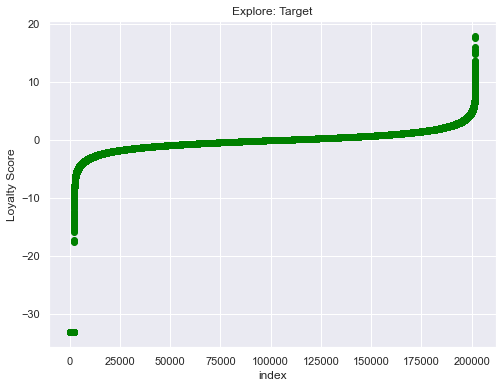

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(range(main_train.shape[0]), np.sort(main_train['target'].values),marker='o',c='green')
plt.xlabel('index', fontsize=12)
plt.ylabel('Loyalty Score', fontsize=12)
plt.title('Explore: Target')
plt.show();

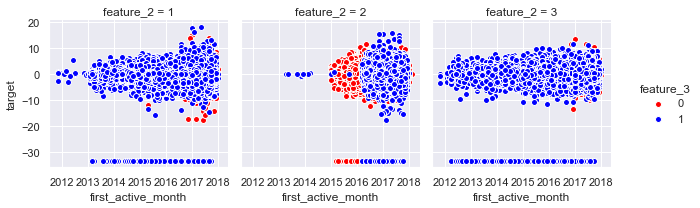

In [59]:
g = sns.FacetGrid(main_train , hue="feature_3",col="feature_2", margin_titles=True,palette={1:"blue",0:"red"})
g=g.map(plt.scatter,"first_active_month","target",edgecolor="w").add_legend();

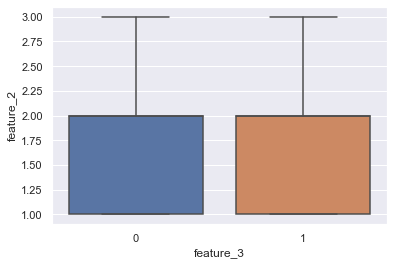

In [60]:
sns.boxplot(x="feature_3",y="feature_2",data=main_test)
plt.show()

### Data Preprocessing 
We will perform some analysis using Pandas

In [61]:
main_train.where(main_train['target']==1).count()

first_active_month    117
card_id               117
feature_1             117
feature_2             117
feature_3             117
target                117
dtype: int64

In [62]:
main_train[main_train["target"]<-32].head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.219281


In [63]:
main_train[main_train["target"]==1].head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target
297,2017-11-01,C_ID_d25746fced,2,1,0,1.0
904,2015-08-01,C_ID_76e4bf4bb7,1,2,0,1.0
910,2017-03-01,C_ID_e88589f8a3,2,2,0,1.0
2213,2017-06-01,C_ID_8369e9930c,2,2,0,1.0
5479,2015-08-01,C_ID_ffafee7ba5,4,2,0,1.0


In [64]:
main_train.feature_1.unique()

array([5, 4, 2, 1, 3], dtype=int64)

In [65]:
main_train.feature_2.unique()

array([2, 1, 3], dtype=int64)

In [66]:
main_train.feature_3.unique()

array([1, 0], dtype=int64)

In [67]:
main_train.first_active_month.unique()

array(['2017-06-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2017-03-01

In [68]:
main_train.card_id.unique()

array(['C_ID_92a2005557', 'C_ID_3d0044924f', 'C_ID_d639edf6cd', ...,
       'C_ID_7666735b3d', 'C_ID_73f5a0efd0', 'C_ID_92c9984c58'],
      dtype=object)

In [69]:
main_train.target.unique()

array([-0.8202826 ,  0.39291325,  0.68805599, ...,  0.09349415,
       -4.67658938, -1.85941301])

### Some New Feature

In [70]:
df_train=main_train
df_test=main_test

In [72]:
df_train["year"]=main_train["first_active_month"].dt.year
df_test["year"]= main_test["first_active_month"].dt.year

In [74]:
df_train["month"]=main_train["first_active_month"].dt.month
df_test["month"] = main_test["first_active_month"].dt.month

### Feature Encoding 

In [76]:
x_train = df_train.drop(["target","card_id","first_active_month"],axis=1)
x_test = df_test.drop(["card_id","first_active_month"],axis=1)

In [78]:
y_train = df_train["target"]
df_train = df_train.sample(frac=1,random_state=7)

In [79]:
Trn_x,val_x,Trn_y,val_y = train_test_split(x_train,y_train,test_size=0.1,random_state=7)
trn_x,test_x,trn_y,test_y = train_test_split(Trn_x, Trn_y,test_size=0.1,random_state=7)


7- Apply Learning
How to understand what is the best way to solve our problem?!



7-1 Evaluation
Submissions are scored on the root mean squared error. RMSE(Root Mean Squared Error) is defined as:where y^ is the predicted loyalty score for each card_id, and y is the actual loyalty score assigned to a card_id.

Note: You must answer the following question: How does your company expect to use and benefit from your model.
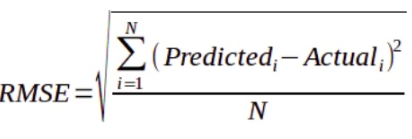
        

In [82]:
## rmse
def rmse(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

In [85]:
# converting into xgb DMatrix
Train = xgb.DMatrix(trn_x,label = trn_y)
Validation = xgb.DMatrix(val_x, label = val_y)
Test = xgb.DMatrix(test_x)

In [86]:
params = {"booster":"gbtree","eta":0.1,'min_split_loss':0,'max_depth':6,
         'min_child_weight':1, 'max_delta_step':0,'subsample':1,'colsample_bytree':1,
         'colsample_bylevel':1,'reg_lambda':1,'reg_alpha':0,
         'grow_policy':'depthwise','max_leaves':0,'objective':'reg:linear','eval_metric':'rmse',
         'seed':7}
history ={}  # This will record rmse score of training and test set
eval_list =[(Train,"Training"),(Validation,"Validation")]

In [91]:
clf = xgb.train(params, Train, num_boost_round=119, evals=eval_list, obj=None, feval=None, maximize=False, 
          early_stopping_rounds=40, evals_result=history);

[10:05:17] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Training-rmse:3.93312	Validation-rmse:3.92998
[1]	Training-rmse:3.91568	Validation-rmse:3.91308
[2]	Training-rmse:3.90149	Validation-rmse:3.89946
[3]	Training-rmse:3.88996	Validation-rmse:3.88828
[4]	Training-rmse:3.88055	Validation-rmse:3.87928
[5]	Training-rmse:3.87292	Validation-rmse:3.87203
[6]	Training-rmse:3.86667	Validation-rmse:3.86618
[7]	Training-rmse:3.86162	Validation-rmse:3.86147
[8]	Training-rmse:3.85751	Validation-rmse:3.85764
[9]	Training-rmse:3.85419	Validation-rmse:3.85453
[10]	Training-rmse:3.85143	Validation-rmse:3.85211
[11]	Training-rmse:3.84917	Validation-rmse:3.85009
[12]	Training-rmse:3.84733	Validation-rmse:3.84852
[13]	Training-rmse:3.84585	Validation-rmse:3.84724
[14]	Training-rmse:3.84457	Validation-rmse:3.84634
[15]	Training-rmse:3.84356	Validation-rmse:3.84555
[16]	Training-rmse:3.84268	Validation-r

In [95]:
prediction= clf.predict(xgb.DMatrix(x_test)) 

In [96]:
submission = pd.DataFrame({"card_id": main_test["card_id"].values,"target":np.ravel(prediction)})

### 8- Conclusion
This kernel is not completed yet , I have tried to cover all the parts related to the process of Elo problem with a variety of Python packages and I know that there are still some issues then I hope to get your feedback to improve it.